
# Global optimization of an MGA low-thrust trajectory
The example demonstrates the use of the sims-flanagan module of pykep to perform global optimization of a multiple leg interplanetary trajectory over large launch windows. In particular, it defines a transfer between Earth and Mercury making use of a Venus intermediate fy-by as an global optimization problem and it then attempts to find one solution using the Monotonic Basin Hopping meta-algorithm connected to an SQP local optimization technique.

This solution technique (MBH + SQP) was developed by members of the pykep team and the original publication can be found here:

Yam, C. H., D. D. Lorenzo, and D. Izzo. "Low-thrust trajectory design as a constrained global optimization problem." Proceedings of the Institution of Mechanical Engineers, Part G: Journal of Aerospace Engineering 225, no. 11 (2011): 1243-1251.

A., Cassioli, D. Izzo, Di Lorenzo, D., Locatelli, M. and Schoen, F.: "Global optimization approaches for optimal trajectory planning." In Modeling and optimization in space engineering, pp. 111-140. Springer, New York, NY, 2012.


In [1]:
# Imports
import pykep as pk
import pygmo as pg
import numpy as np
from pykep.examples import add_gradient, algo_factory

# Plotting imports
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from pykep import epoch, DAY2SEC, AU, MU_SUN, lambert_problem
from pykep.planet import jpl_lp
from pykep.orbit_plots import plot_planet, plot_lambert

In [2]:

# We define the Lambert problem
t1 = epoch(0)
t2 = epoch(640)
dt = (t2.mjd2000 - t1.mjd2000) * DAY2SEC

earth = jpl_lp('earth')
rE, vE = earth.eph(t1)

mars = jpl_lp('mars')
rM, vM = mars.eph(t2)

# We solve the Lambert problem
l = lambert_problem(r1 = rE, r2 = rM, tof = dt, mu = MU_SUN, max_revs=2)



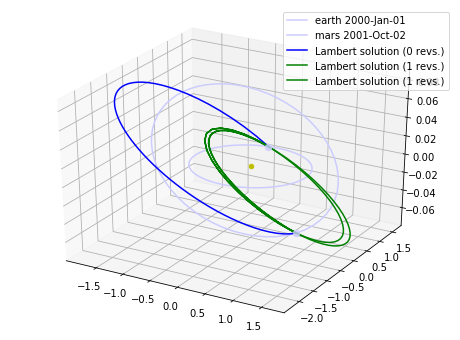

In [3]:
# We plot 
mpl.rcParams['legend.fontsize'] = 10

# Create the figure and axis
fig = plt.figure(figsize = (8,6))
axis = fig.gca(projection='3d')
axis.scatter([0], [0], [0], color=['y'])

# Plot the planet orbits
plot_planet(earth, t0=t1, color=(0.8, 0.8, 1), legend=True, units=AU, ax=axis)
plot_planet(mars, t0=t2, color=(0.8, 0.8, 1), legend=True, units=AU, ax=axis)

# Plot the Lambert solutions
axis = plot_lambert(l, color='b', legend=True, units=AU, ax=axis)
axis = plot_lambert(l, sol=1, color='g', legend=True, units=AU, ax=axis)
axis = plot_lambert(l, sol=2, color='g', legend=True, units=AU, ax=axis)


